# Sampling Distributions Dance Party! 

Get your dancing shoes ready! You are a DJ trying to make sure you are ready for a big party. You don’t have time to go through all the songs you can work with. Instead, you want to make sure that any sample of 30 songs from your playlist will get the party started. To do this, you will use the power of sampling distributions! 

source: https://www.kaggle.com/datasets/mrmorj/dataset-of-songs-in-spotify

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [2]:
# task 1: load in the spotify dataset
spotify_data = pd.read_csv("genres_v2.csv",low_memory=False)
spotify_data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [3]:
# task 2: preview the dataset
spotify_data.head()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
# task 3: select the relevant column
song_tempos = spotify_data['tempo']
song_tempos

0        156.985
1        115.080
2        218.050
3        186.948
4        147.988
          ...   
42300    150.013
42301    149.928
42302    154.935
42303    150.042
42304    155.047
Name: tempo, Length: 42305, dtype: float64

In [5]:
def choose_statistic(x, sample_stat_text):
  # calculate mean if the text is "Mean"
  if sample_stat_text == "Mean":
    return np.mean(x)
  # calculate minimum if the text is "Minimum"
  elif sample_stat_text == "Minimum":
    return np.min(x)
  # calculate variance if the text is "Variance"
  elif sample_stat_text == "Variance":
    return np.var(x)
  # if you want to add an extra stat
  # raise error if sample_stat_text is not "Mean", "Minimum", or "Variance"
  else:
    raise Exception('Make sure to input "Mean", "Minimum", or "Variance"')

def population_distribution(population_data):
  # plot the population distribution
  sns.histplot(population_data, stat='density')
  # informative title for the distribution 
  plt.title(f"Population Distribution")
  # remove None label
  plt.xlabel('')
  plt.show()
  plt.clf()

def sampling_distribution(population_data, samp_size, stat):
  # list that will hold all the sample statistics
  sample_stats = []
  for i in range(500):
    # get a random sample from the population of size samp_size
    samp = np.random.choice(population_data, samp_size, replace = False)
    # calculate the chosen statistic (mean, minimum, or variance) of the sample
    sample_stat = choose_statistic(samp, stat)
    # add sample_stat to the sample_stats list
    sample_stats.append(sample_stat)
  
  pop_statistic = round(choose_statistic(population_data, stat),2)
  # plot the sampling distribution
  sns.histplot(sample_stats, stat='density')
  # informative title for the sampling distribution
  plt.title(f"Sampling Distribution of the {stat} \nMean of the Sample {stat}s: {round(np.mean(sample_stats), 2)} \n Population {stat}: {pop_statistic}")
  plt.axvline(pop_statistic,color='g',linestyle='dashed', label=f'Population {stat}')
  # plot the mean of the chosen sample statistic for the sampling distribution
  plt.axvline(np.mean(sample_stats),color='orange',linestyle='dashed', label=f'Mean of the Sample {stat}s')
  plt.legend()
  plt.show()
  plt.clf()

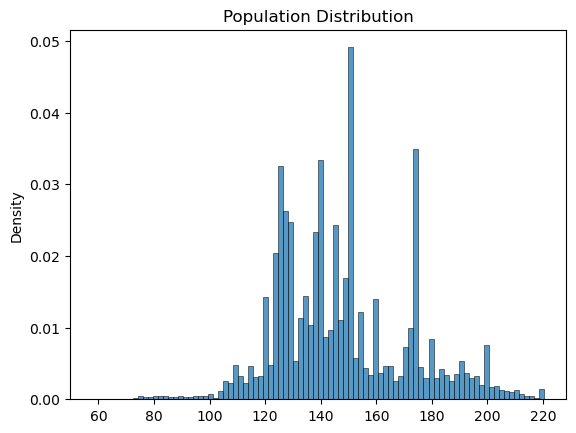

<Figure size 640x480 with 0 Axes>

In [6]:
# task 4: plot the population distribution with the mean labeled
population_distribution(song_tempos)


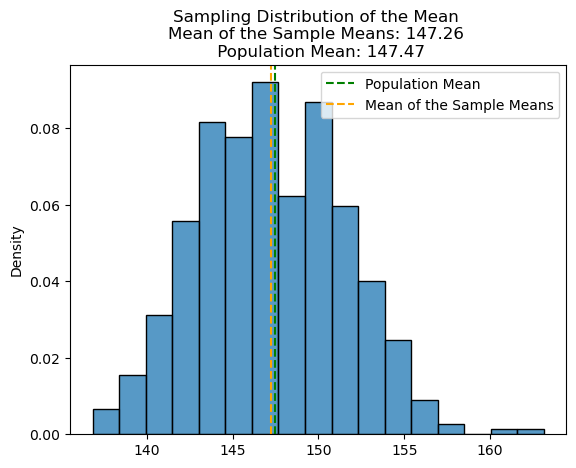

<Figure size 640x480 with 0 Axes>

In [7]:
# task 5: sampling distribution of the sample mean
sampling_distribution(song_tempos, 30, "Mean")


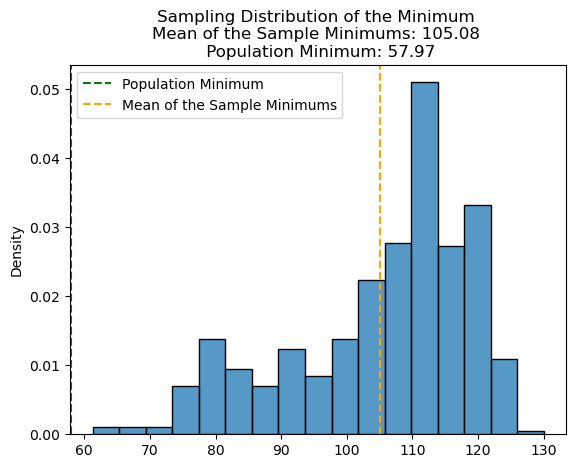

<Figure size 640x480 with 0 Axes>

In [8]:
# task 6: sampling distribution of the sample minimum
sampling_distribution(song_tempos, 30, "Minimum")


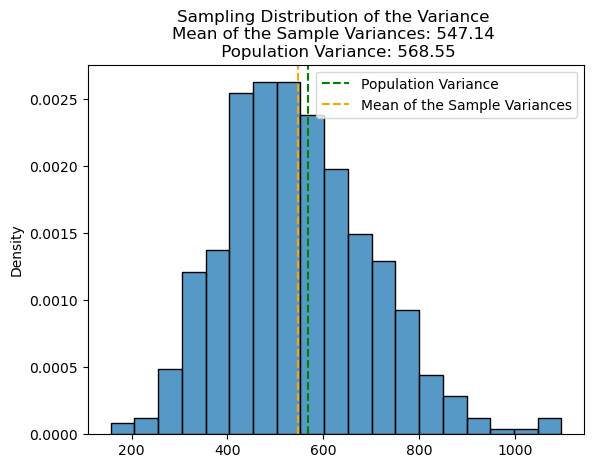

<Figure size 640x480 with 0 Axes>

In [9]:
# task 7: sampling distribution of the sample variance
sampling_distribution(song_tempos, 30, "Variance")


In [10]:
# task 8: calculate the population mean and standard deviation
population_mean = np.mean(song_tempos)
population_std = np.std(song_tempos)
print(population_mean)
print(population_std)

147.4740559035556
23.84434149567969


In [11]:
# task 9: calculate the standard error
standard_error = population_std/(30**.5)
print(standard_error)

4.353361235346746


In [12]:
# task 10: calculate the probability of observing an average tempo of 140bpm or lower from a sample of 30 songs
print(stats.norm.cdf(140, population_mean, standard_error))


0.043003550159626626


In [13]:
# task 11: calculate the probability of observing an average tempo of 150bpm or higher from a sample of 30 songs
print(1-stats.norm.cdf(150, population_mean, standard_error))


0.2808802810180707
